## Lab 2: Getting to Know Your Data 

In this lab you are going to learn how understand and query your dataset in Python using Pandas, Numpy and Matplotlib packages. 

You will learn how to implement some basic similarity distances.

### 1. Similarity and Distance Measures Between Data

The below dataset ("data.h5") contains:

- a training set of images labeled as cat (y=1) or non-cat (y=0).

Each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px). Let's get more familiar with the dataset. Load the data by running the following code.

In [2]:
import h5py
import numpy as np
from numpy import linalg as LA
dataset2 = h5py.File('train_catvnoncat.h5', "r")
images = np.array(dataset2["train_set_x"][:])
images.shape

(209, 64, 64, 3)

Each line of your dataset of images is an array representing an image. You can visualize an example by running the following code. Feel free also to change the index value and re-run to see other images.

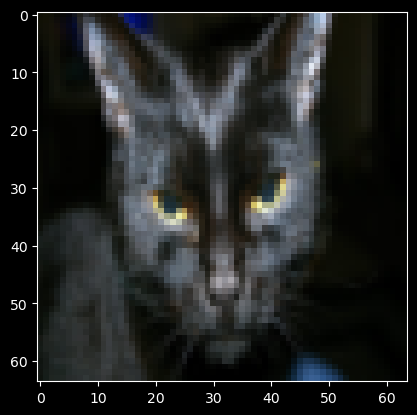

In [3]:
# Example of a picture
import matplotlib.pyplot as plt
index = 25
plt.imshow(images[index])

Many software bugs in machine learning come from having matrix/vector dimensions that do not fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.

**Exercise 1.1**: Find the values for:
- m_images (number of images)
- num_px (= height = width of an image).

Remember that **images** is a numpy-array of shape `(m_, num_px, num_px, 3)`. For instance, you can access `m_images` by writing `images.shape[0]`.

In [4]:
### START CODE HERE ### (≈ 2 lines of code)
m_images, width, height = images.shape[:3]
### END CODE HERE ###

print (f"Number of images: m_images = {m_images}")
print (f"Height/Width of each image: num_px = {width}/{height}")

Number of images: m_images = 209
Height/Width of each image: num_px = 64/64


*Expected Outcome* 

*Number of images: m_train = 209*

*Height/Width of each image: num_px = 64*

For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px * num_px * 3, 1). After this, the dataset will be a numpy-array where each column represents a flattened image. There should be m_image columns.

**Exercise 2.1**: Reshape the image dataset so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px  ∗  num_px  ∗  3, 1). A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b ∗ c ∗ d, a) is to use:

`X_flatten = X.reshape(X.shape[0], -1).T        # X.T is the transpose of X`

In [5]:
### START CODE HERE ### (≈ 1 lines of code)
dataset_flatten = images.reshape(images.shape[0], -1).T
### END CODE HERE ###

print (f"images flatten shape: {dataset_flatten.shape}")

images flatten shape: (12288, 209)


*Expected Outcome: images flatten shape: (12288, 209)*

**Exercise 3.1**: Implement L1, L2, and consine similarity. If you need calculus operations, you can exploit the **numpy** tool. Once the distances are implemented, find the most similar image from to a given input image based on those measures and using `dataset_flatten`. You might find it useful displaying the input and the output images so you can visually see the difference. What do you observe?

Hint: you don't need for loops into the similarity metrics, you just need loops in `top1Similarity` for iterating over all the images.

In [6]:
#L1 Metric

from math import*

def L1(x1, x2):
    """
    Arguments:
    x1 -- vector of size m 
    x2 -- vector of size m 
    
    Returns:
    distance -- the L1 distance between the two vectors
    """

    x1 = x1.astype(np.int64)
    x2 = x2.astype(np.int64)
    ### START CODE HERE ### 
    distanceL1 = np.sum(np.abs(x2 - x1))
    ### END CODE HERE ###
    
    return distanceL1

In [7]:
# L2 Metric

def L2(x1, x2):
    """
    Arguments:
    x1 -- vector of size m 
    x2 -- vector of size m 
    
    Returns:
    distance -- the L2 distance between the two vectors
    """
    
    x1 = x1.astype(np.int64)
    x2 = x2.astype(np.int64)
    ### START CODE HERE ###
    distanceL2 = np.sqrt(np.sum(np.square(x2 - x1)))    
    ### END CODE HERE ###
    
    return distanceL2

In [8]:
# Cosine Similarity

def Cosine(x1, x2):
    """
    Arguments:
    x1 -- vector of size m 
    x2 -- vector of size m 
    
    Returns:
    distance -- the cosine distance between the two vectors
    """
    
    x1 = x1.astype(np.int64)
    x2 = x2.astype(np.int64)
    ### START CODE HERE ###
    # pay attention, you have to convert the cosine similarity saw in class in a distance
    simCos = np.dot(x1, x2)/(np.sqrt(np.sum(x1 * x1)) * np.sqrt(np.sum(x2 * x2)))
    #distanceCos = np.dot(x1, x2)/(LA.norm(x1) * LA.norm(x2))
    distanceCos = 1 - simCos
    ### END CODE HERE ###
    return distanceCos

In [9]:
# find the most similar image to an input image
def top1Similarity(img, dataset):
    """
    Arguments:
    img -- index of a vector of size m (represents an image)
    dataset -- a DataFrame of images where each column represents an image (a vector of size m)
    
    Returns:
    top1 -- the most similar images alogn with their scores
    """

    ### START CODE HERE ### 
    distanceL1 = L1(dataset[:,img], dataset[:,0])
    distanceL2 = L2(dataset[:,img], dataset[:,0])
    distanceCos = Cosine(dataset[:, img], dataset[:,0])
    topL1_Image = 0
    topL2_Image = 0
    topCos_Image = 0
    for i in range(1, dataset.shape[1]):
        if i != img: # skip the input img
            L1value = L1(dataset[:, img], dataset[:, i])
            L2value = L2(dataset[:, img], dataset[:, i])
            Cosvalue = Cosine(dataset[:, img], dataset[:, i])
        
            if L1value < distanceL1:
              distanceL1 = L1value
              topL1_Image = i
                
            if L2value < distanceL2:
              distanceL2 = L2value
              topL2_Image = i

            if Cosvalue < distanceCos:
              distanceCos = Cosvalue
              topCos_Image = i
    ### END CODE HERE ###
    return topL1_Image, topL2_Image, topCos_Image, distanceL1, distanceL2, distanceCos

The query image is:


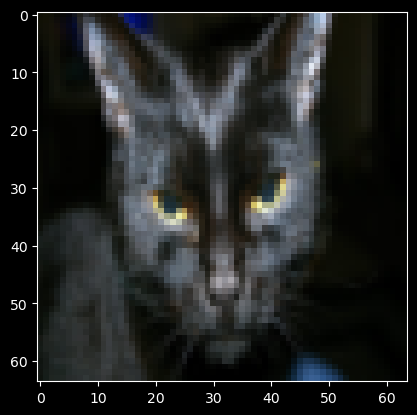

In [10]:
############# Test the Similarity Function ##########
QueryImage = 25
topL1_Image, topL2_Image, topCos_Image, distanceL1, distanceL2, distanceCos = top1Similarity(QueryImage, dataset_flatten)
print("The query image is:") 
plt.imshow(images[QueryImage]) 

The most similar image using L1 is (score 385946):


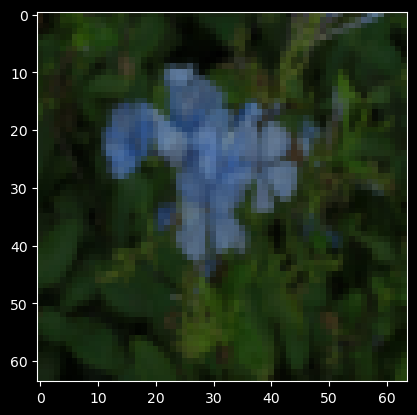

In [11]:
print(f"The most similar image using L1 is (score {distanceL1}):")
plt.imshow(images[topL1_Image])

The most similar image using L2 is (score 4776.558175087999):


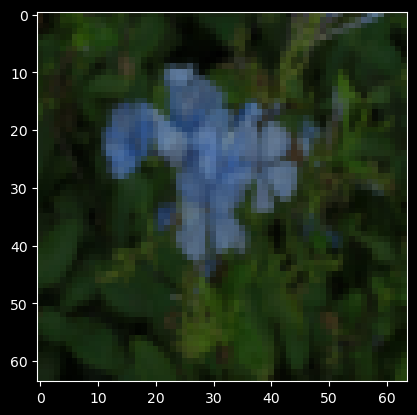

In [12]:
print(f"The most similar image using L2 is (score {distanceL2}):")
plt.imshow(images[topL2_Image])

The most similar image using Cosine is (score 0.2586418011859246):


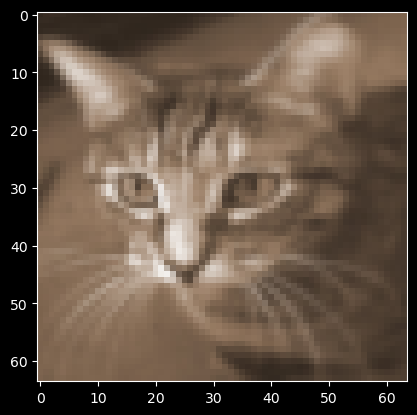

In [13]:
print(f"The most similar image using Cosine is (score {distanceCos}):")
plt.imshow(images[topCos_Image])

### 2. Data Preprocessing

Poor data quality can have an adverse effect on data mining. Among the common data quality issues include noise, outliers, missing values, and duplicate data. This section presents examples of Python code to alleviate some of these data quality problems. We begin with an example dataset from the UCI machine learning repository containing information about breast cancer patients. We will first download the [dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29) using Pandas read_csv() function and display its first 5 data points.

In [14]:
import pandas as pd
data = pd.read_csv('breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'], axis=1)

Display the number of instances, attributes, the dataset info and the first 5 rows.

In [15]:
print(f"Instances: {len(data)}, Attributes: {data.shape[1]}")
data.info()
data.head(5)

Instances: 699, Attributes: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### 2.1 Missing Values

It is not unusual for an object to be missing one or more attribute values. In some cases, the information was not collected; while in other cases, some attributes are inapplicable to the data instances. This section presents examples on the different approaches for handling missing values. 

According to the description of the data (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), the missing values are encoded as '?' in the original data. Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data.

Replace the `?` with `np.Nan`, then check the number of missing values for each column of the dataset. The combination `isna()` with `.sum()` gives you the number of missing values a dataframe.

In [16]:
# Your code here
data.replace('?', np.nan, inplace=True)
missing_values = data.isna().sum()
missing_values

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Note that the values in all columns (except for 'Bare Nuclei') are originally stored as `int64` whereas the values in the `Bare Nuclei` column are stored as string objects (since the column initially contains strings such as `?` for representing missing values). Thus, we must convert the column into numeric values. Use the function `pd.to_numeric` to convert the `Bare Nuclei` column in a numeric format and then print the info box of the dataframe.

In [17]:
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


Observe that only the 'Bare Nuclei' column contains missing values. In the following, you will replace the missing values in the `Bare Nuclei` column with the median, mean and most frequent value of that column. This can be achieved with the `fillna` Pandas function (check online the documentation). The values for the imputation can be the mean, the mode or the median. Look up these functions on the documentation. Here a stub of the code:

In [19]:
data2 = data['Bare Nuclei']
print('Before replacing missing values:')
print(data2[20:25])


### Yoour code starts here, 2 lines.
# Use fillna() to impute the missing values using different strategies (mean, median, most_frequent).
# Use a new dataframe called clean_data
mean = data['Bare Nuclei'].mean()
clean_data = data.fillna(value=mean)
###
print(clean_data['Bare Nuclei'][20:25])

Before replacing missing values:
20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: Bare Nuclei, dtype: float64
20    10.000000
21     7.000000
22     1.000000
23     3.544656
24     1.000000
Name: Bare Nuclei, dtype: float64


Instead of replacing the missing values, another common approach is to discard the data points that contain missing values. This can be easily accomplished by applying the `dropna()` function to the data frame.

In [ ]:
# Your code here

### 2.2 Duplicate Data

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. The term deduplication is often used to refer to the process of dealing with duplicate data issues. 

The `duplicated()` function will return a Boolean array that indicates whether each row is a duplicate of a previous row in the table. Then the `.sum()` function will return the number of duplicated rows. Use these functions to print the number of duplicated rows.

Although the duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

In [ ]:
# Your code here

Duplicate data can be easily removed with the `drop_duplicates()` Pandas function. Print the number of rows after removal, use `drop_duplicates()` to remove duplicate data, print the number of rows after the removal.

In [ ]:
# Your code here

### 2.3 Outliers


Outliers are data instances with characteristics that are considerably different from the rest of the dataset. In the example code below, you will draw a boxplot to identify the columns in the table that contain outliers. Before remove the `Class` column.

In [ ]:
# Your code here

The boxplots suggest that only 2 of the columns (Single Epithetial Cell Size and Mitoses) contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute to have all values with 0 mean and 1 standard deviation. An outlier is then defined as an element with abnormally high or low Z-scores (e.g., if Z > 3 or Z <= -3) for at least one attribute. Z can be computed as:

`Z = (df - df.mean())/df.std()`

and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3). 

In the following code create a new dataframe for the Z score, remove from it the elements with a Z score > 3 or <= -3 for at least one attribute. Plot the boxplots again and look how the outliers changed. Display the number of removed outliers.

Hint: the logical condition to remove outliers is to keep only the elements with -3 < Z <= 3 for all the columns, use `sum(axis=1)==NumberOfColumns`.

In [ ]:
# Your code here

Another method for removing the outliers is to use the **Interquartile range**: an outlier is a sample with at least one attribute with value < Q1 - 1.5IQR or > Q3 + 1.5IQR, where IQR = Q3 - Q1, see the whiskers of the boxplot diagram.

Write some code where you retain the data between Q1 - 1.5IQR and Q3 + 1.5IQR, print the number of samples before and after the removal of the outliers, print the new boxplots without the outliers.

Hint: use `Q = clean_data.quantile()` to compute Q1 and Q3.

In [ ]:
# Your code here

### 2.4 Discretization

Discretization is a data preprocessing step that is often used to transform a continuous-valued attribute to a categorical attribute. The example below illustrates two simple but widely-used unsupervised discretization methods (equal width and equal depth) applied to the 'Clump Thickness' attribute of the breast cancer dataset.

First, plot a histogram that shows the distribution of the attribute values for the `data` dataframe. The `value_counts()` function can also be applied to count the frequency of each attribute value.

In [ ]:
# Your code here

For the equal width method, apply the `cut()` function to discretize the attribute into 4 bins of similar interval widths. Then use the `value_counts()` function to determine the number of instances in each bin.

In [ ]:
# Your code here

For the equal frequency method, use the `qcut()` to partition the values of `data['Clump Thickness']` into 4 bins such that each bin has nearly the same number of instances.

In [ ]:
# Your code here

### 2.5 Aggregation

Data aggregation is a preprocessing task where the values of two or more objects are combined into a single object. The motivation for aggregation includes (1) reducing the size of data to be processed, (2) changing the granularity of analysis (from fine-scale to coarser-scale), and (3) improving the stability of the data.

In the example below, you will use the daily precipitation time series data for a weather station located at Detroit Metro Airport. The raw data was obtained from the Climate Data Online website (https://www.ncdc.noaa.gov/cdo-web/). The daily precipitation time series will be compared against its monthly values.

The code below will load the precipitation time series data and draw a line plot of its daily time series.

Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

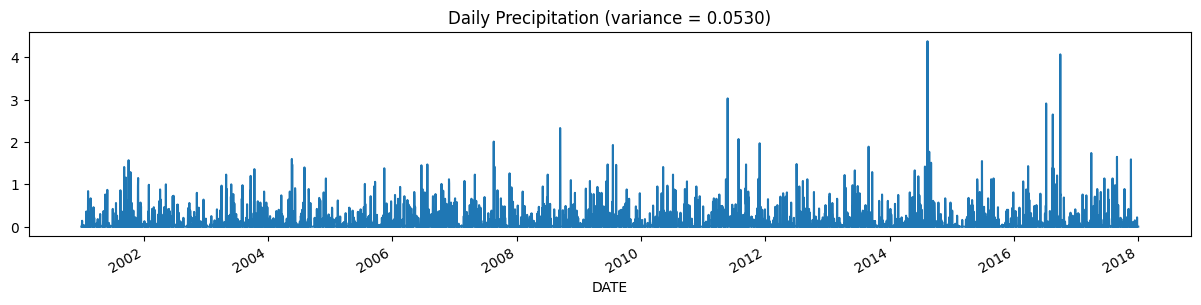

In [ ]:
import pandas as pd
daily = pd.read_csv('DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title(f'Daily Precipitation (variance = {daily.var():.4f})')

Observe that the daily time series appear to be quite chaotic and varies significantly from one time step to another. Aggregate the time serie by month to obtain the total monthly precipitation values. The resulting time series appears to vary more smoothly compared to the daily time series.

Hint: `df.groupby(pd.Grouper(freq='M'))` will group by month (`M`). Then use the right aggregator function, such as, the mean, the sum, the mode or others.

In [ ]:
# Your code here

In the example below, group the daily precipitation time series by year to obtain the annual precipitation values. 

In [ ]:
# Your code here

### 2.6 Taking care of Categorical Features

We can take care of categorical features by converting them to integers. There are 2 common ways to do so:

- **One Hot Encoding** (for nominal categories: without an order);
- **Label Encoding** (for ordinal categories: order matters).

Let's see an example with a new dataset:

In [ ]:
car_data = pd.read_csv('CarBuyers.csv')
car_data

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984
...,...,...,...,...,...,...,...,...,...,...,...
6087,Land-Rover,Defender,108.747195,7.853659,207.609756,2304.975610,diesel,"1,012",150,80,"1,242"
6088,Toyota,RAV4,43.548516,1.354839,137.774193,2261.193548,petrol,670,482,66,"1,218"
6089,Alfa-Romeo,Spider,55.200000,6.000000,163.500000,2696.500000,petrol,790,247,81,"1,118"
6090,Honda,Shuttle,30.081000,4.000000,110.000000,2254.000000,petrol,639,416,49,"1,104"


Let's concentrate on the Fuel column, we want to transform it into some asymmetric attributes using the **One Hot encoding**. The Pandas function `get_dummies` will do the job. As it is not an in-place function you have to save the dataframe in a new variable, concatenate the result to the original dataframe (see the `concat` function) and remove the old column:

In [ ]:
catDf = pd.get_dummies(data=car_data['Fuel'])
catDf = pd.concat([catDf, car_data], axis=1)
del catDf['Fuel']
catDf

,automatic,diesel,petrol,Manufacturer,Model,Price,Transmission,Power,Engine CC,Male,Female,Unknown,Total
0,False,False,True,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,814172,422731,"56,487",1293390
1,False,False,True,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,554879,631666,"54,057",1240602
2,False,False,True,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,483216,310604,"47,563",841383
3,False,False,True,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,241287,312556,"28,004",581847
4,False,False,True,BMW,320i,47.848370,6.444444,126.111111,1995.777778,408016,115843,"29,125",552984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,False,True,False,Land-Rover,Defender,108.747195,7.853659,207.609756,2304.975610,"1,012",150,80,"1,242"
6088,False,False,True,Toyota,RAV4,43.548516,1.354839,137.774193,2261.193548,670,482,66,"1,218"
6089,False,False,True,Alfa-Romeo,Spider,55.200000,6.000000,163.500000,2696.500000,790,247,81,"1,118"
6090,False,False,True,Honda,Shuttle,30.081000,4.000000,110.000000,2254.000000,639,416,49,"1,104"


Now let's suppose we want to assign an order to the values in the Fuel column. We want to transform these values into numeric ordered values usign a **label encoding**. As first, we need to pass a mapping of (label value: numeric value) and then performing a replace (in-place):

In [ ]:
scale_mapper = {"petrol": 1, "diesel": 2, "automatic": 3}
car_data["Fuel"] = car_data["Fuel"].replace(scale_mapper)
car_data

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,1,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,1,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,1,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,1,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,1,408016,115843,"29,125",552984
...,...,...,...,...,...,...,...,...,...,...,...
6087,Land-Rover,Defender,108.747195,7.853659,207.609756,2304.975610,2,"1,012",150,80,"1,242"
6088,Toyota,RAV4,43.548516,1.354839,137.774193,2261.193548,1,670,482,66,"1,218"
6089,Alfa-Romeo,Spider,55.200000,6.000000,163.500000,2696.500000,1,790,247,81,"1,118"
6090,Honda,Shuttle,30.081000,4.000000,110.000000,2254.000000,1,639,416,49,"1,104"


### 2.7 Feature Scaling: Normalization vs Standardization

Normalization vs. standardization is an eternal question among machine learning newcomers:

- Standardization can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range.
- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

Feature scaling often leads to a better performance because gradient descent converges faster after normalization or the distances in clustering or k-means can be meaningless without normalization.

**The choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.**

#### Standardization

Is the transformation of the numeric attributes in their Z-score: subtracting the mean of the data to each value and dividing by the standard deviation of the data in that column:

$$
Z = \frac{X - \mu}{\sigma}
$$

**Exercise**:
- Compute mean and stdev of the Price, Transmission, Power, and Engine CC columns;
- apply standardization on these columns;
- compute mean and stdev and check the differences.

In [ ]:
# Your code here

This can be achieved by using the `StandardScaler` of the `Scikit-Learn` Python library:

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
z = ss.fit_transform(car_data[numeric_attr])
print(z)

NameError: name 'numeric_attr' is not defined

#### Normalization

It does not have a standard definition, it general it scales the values in a range: [-1, 1] or [0,1].

A definition of normalization is changing x to $ \frac{x}{\| x\|} $ (dividing each row vector of x by its norm).

For example, if $$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{3}$$ then $$\| x\| = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4} $$and        $$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$$

**Exercise**:
Implement normalizeRows() to normalize the rows of a matrix. After applying this function to an input matrix x, each row of x should be a vector of unit length (meaning length 1).

In [ ]:
import numpy as np

def normalizeRows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).
    
    Argument:
    x -- A numpy matrix of shape (n, m)
    
    Returns:
    x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """
    
    # Your code here

    return x

In [ ]:
x = car_data[numeric_attr]
print(f"normalizeRows(x) = \n{normalizeRows(x)}")

This kind of normalization scales an input vector $x$ in the [0, 1] interval such that its Euclidean norm $||x||$ is 1. 

This can also be achieved by the `Normalizer` function of Sklearn. Have a look at the documentation and use it in the example used above:

In [ ]:
# Your code here

Another definition of normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as **Min-Max scaling**.

Here’s the formula for normalization:

$$X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

- When the value of $X$ is the minimum value in the column, the numerator will be 0, and hence $X_{new}$ is 0
- On the other hand, when the value of $X$ is the maximum value in the column, the numerator is equal to the denominator and thus the value of $X_{new}$ is 1
- If the value of $X$ is between the minimum and the maximum value, then the value of $X_{new}$ is between 0 and 1

**Exercise**

Implement in Pandas the Min-Max scaling of the `numeric_attr` for the car data. It is important to reload the data!

In [ ]:
# Your code here

**Exercise**

Repeat the exercise by using the `MinMaxScaler` of Sklearn. Have a look at the documentation.

In [ ]:
# Your code here

### 3. Exploratory Data Analysis

Data exploration refers to the preliminary investigation of data in order
to better understand its specific characteristics. There are two key motivations for data exploration:
1. To help users select the appropriate preprocessing and data analysis technique used.
2. To make use of humans’ abilities to recognize patterns in the data.

#### 3.1. Summary Statistics

Summary statistics are quantities, such as the mean and standard deviation, that capture various characteristics of a potentially large set of values with a single number or a small set of numbers. You will use the Iris sample data, which contains information on 150 Iris flowers, 50 each from one of three Iris species: Setosa, Versicolour, and Virginica. Each flower is characterized by five attributes:

- sepal length in centimeters

- sepal width in centimeters

- petal length in centimeters

- petal width in centimeters

- class (Setosa, Versicolour, Virginica) 

You will practice to compute various summary statistics from the DataFrame.

**Exercise 3.1.**

1. Download the <a href="http://archive.ics.uci.edu/ml/datasets/Iris">Iris dataset</a> from the UCI machine learning repository. It is a `csv` file named `iris.data`.
2. Load the dataset in a Pandas dataframe.
3. Assign the dataframe the following column names: `['sepal length', 'sepal width', 'petal length', 'petal width', 'class']`.
4. Display the first 60 lines of the dataframe.
5. What are the categorical and numerical attributes?
6. Visualize the summary statistics for both features/attributes and the class.
7. Visualize an overview of the data (e.g., number of samples, columns, non-null objects, data types).
8. Why does not the class attribute have some statistics?

In [ ]:
# Your code here

In [ ]:
# Your code here

In [ ]:
# Your code here

**Exercise 3.2.**

Repeat point 1, 2, 4, 5, 6, 7 for the [CarBuyers](https://www.kaggle.com/brijlaldhankour/car-buyers) dataset.

In [ ]:
# Your code here

Some attributes are regarded as strings but are ordinal attributes! This is due to a wrong data format that has to be fixed. This is a nice example on the noise in data and how it has to be fixed with ad-hoc solutions.

In [ ]:
def cell2int(x):
  return int(x.replace(",", ""))

car_data['Male'] = car_data['Male'].apply(cell2int)
car_data['Female'] = car_data['Female'].apply(cell2int)
car_data['Unknown'] = car_data['Unknown'].apply(cell2int)
car_data['Total'] = car_data['Total'].apply(cell2int)
print(car_data.describe(include='all'))

       Manufacturer  Model        Price  Transmission        Power  \
count          6092   6092  6092.000000   6092.000000  6092.000000   
unique           52    501          NaN           NaN          NaN   
top            Ford  Space          NaN           NaN          NaN   
freq            355     49          NaN           NaN          NaN   
mean            NaN    NaN    41.230074      5.131491   111.478881   
std             NaN    NaN    51.357916      1.343858    67.621849   
min             NaN    NaN     3.332200      0.000000    15.600000   
25%             NaN    NaN    18.513000      4.600000    70.250000   
50%             NaN    NaN    29.043000      5.000000    94.062500   
75%             NaN    NaN    43.863631      5.966102   121.857143   
max             NaN    NaN   646.605000      8.277311   450.000000   

          Engine CC         Fuel          Male         Female       Unknown  \
count   6092.000000  6092.000000  6.092000e+03    6092.000000   6092.000000   
u

#### 3.2. Data Visualization

**Excercise 3.3.**

- Understand the car buyers dataset, what does it contain?
- Select the data about the manufacturers Seat, Fiat and BMW.
- Plot the histograms for the price and the power attributes of Seat (2 different figures).
- Plot the histograms for the price and the power attributes of BMW (2 different figures).

In [ ]:
# Your code here

**Excercise 3.4.**

- Plot the box plot for the male and the female attributes of Seat (in the same figure).
- Plot the box plot for the male and the female attributes of BMW (in the same figure).
- Plot the box plot for the price and the power attributes of Seat (in the same figure).
- Plot the box plot for the price and the power attributes of BMW (in the same figure).

In [ ]:
# Your code here

**Excercise 3.5.**

- For each class in the Iris dataset, plot the box plots for the four numeric attributes: one figure for each class containing the four attributes.

In [ ]:
# Your code here

**Excercise 3.6.**

- Plot the scatter plot of the Iris Dataset seen in class during the lecture on EDA by avoiding to plot repeated pairs of features.
- Are the classes easly separable?
- Are there correlated features?

In [ ]:
# Your code here

The previous exercise is good for coding. From now on you can use Seaborn for your pairplots.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris_data, hue="class")

# save the plot as JPG file
plt.savefig("iris_pairplot.jpg", dpi=300)

plt.show()